# Part 1: Launch a Duet Server

In [1]:
import syft as sy

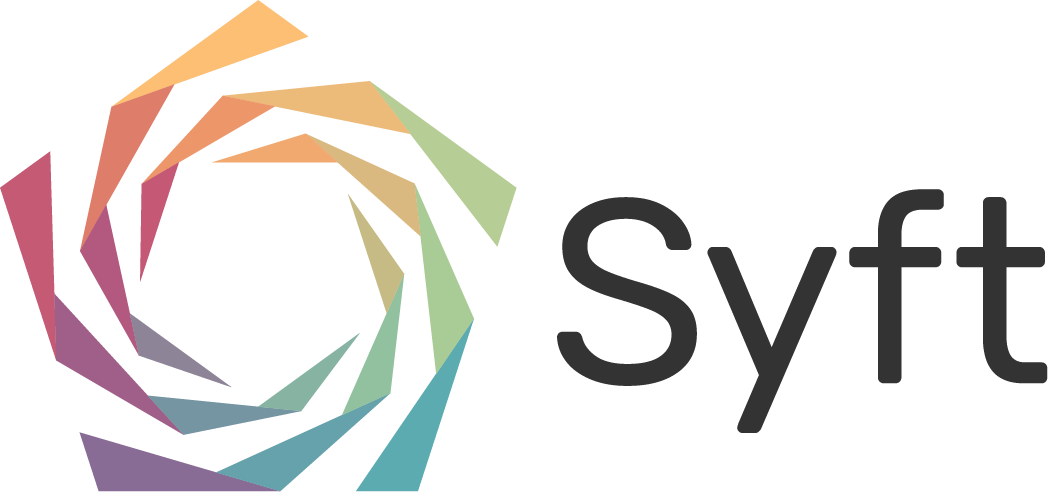

🎤  🎸  ♪♪♪ Starting Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ >             Use at your own risk.
♫♫♫ >
♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000/
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... DONE!
♫♫♫ >
♫♫♫ > STEP 1: Send the following code to your Duet Partner!

import syft as sy
duet = sy.duet("4814df40925c14ae8f950342e3e8d776")

♫♫♫ > STEP 2: Running the code above will print out a 'Client ID'.
♫♫♫ >         Have your duet partner send it to you and enter it below!

♫♫♫ > Duet Partner's Client ID: bfd894e6ea39e6ae4a35db9156d43640
♫♫♫ > Connecting...
♫♫♫ > ...using a running event loop...

♫♫♫ > CONNECTED!

♫♫♫ > DUET LIVE STATUS  -  Objects: 1  Requests: 0   Messages: 128                                                        <UID: b9d69c783381430a97761f0b29ae27b4>

In [2]:
duet = sy.launch_duet(network_url="http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000/")

# Part 2: Upload data to Duet Server

In [3]:
import torch as th

In [4]:
# Data owner has age data of 6 people
age_data = th.tensor([25, 32, 49, 65, 88, 22])

In [5]:
# Data owner names the data with tag "ages"
age_data = age_data.tag("ages")

In [6]:
# Data owner adds a description to the tensor where age data is located
age_data = age_data.describe("This is a list of ages of 6 people.")

In [7]:
# Finally the data owner UPLOADS THE DATA to the Duet server and makes it searchable
# by data scientists. NOTE: The data is still on the Data Owners machine and cannot be
# viewed or retrieved by any Data Scientists without permission.
age_data_pointer = age_data.send(duet, pointable=True)

In [8]:
# Once uploaded, the data owner can see the object stored in the tensor
duet.store

In [9]:
# To see it in a human-readable format, data owner can also pretty-print the tensor information
duet.store.pandas

ID    Tags  \
0  <UID: 7229d4cd650a4a29ba4a70e1cdbb0eb9>  [ages]   

                           Description  
0  This is a list of ages of 6 people.

### <img src="https://github.com/OpenMined/design-assets/raw/master/logos/OM/mark-primary-light.png" alt="he-black-box" width="100"/> Checkpoint 1 : Now STOP and run the Data Scientist notebook until the same checkpoint.

# Part 3: Response to requests coming from Data Scientist

In [ ]:
# To check if there is a request from the Data Scientist, the data owner runs this command occasionally
# or when there is a notification of new request in the DUET LIVE STATUS
duet.requests.pandas

In [10]:
# There's a new request! Let's check what it says.
duet.requests[0].request_description

'Please approve!'

In [11]:
# Doesn't look like a convincing request :( Have to deny it sorry!
duet.requests[0].deny()

In [12]:
# No more request
duet.requests.pandas

Empty DataFrame
Columns: []
Index: []

### <img src="https://github.com/OpenMined/design-assets/raw/master/logos/OM/mark-primary-light.png" alt="he-black-box" width="100"/> Checkpoint 2 : Now STOP and run the Data Scientist notebook until the same checkpoint.

In [13]:
# Oh there's a new request!
duet.requests.pandas

Name                                             Reason  \
0       I am a data scientist and I need to know the a...   

                                Request ID  \
0  <UID: 9b41487d464c4fab98e602b5a59f5605>   

                     Requested Object's ID  
0  <UID: f4a594185a694ce8a9a6f9ad101560ac>

In [14]:
# Let's check what it says.
duet.requests[0].request_description

'I am a data scientist and I need to know the average age for my analysis.'

In [15]:
# The request looks reasonable. Should be accepted :)
duet.requests[0].accept()

### Add request handlers

In [20]:
# You can automatically accept or deny requests, which is great for testing.
# We have more advanced handlers coming soon.

duet.requests.add_handler(action="accept")

### <img src="https://github.com/OpenMined/design-assets/raw/master/logos/OM/mark-primary-light.png" alt="he-black-box" width="100"/> Checkpoint 3 : Well done!